## Importing and reading the file:

In [125]:
import pandas as pd

df = pd.read_csv("immovlan_final_file.csv", encoding="utf-8", on_bad_lines="skip")   #skips any broken lines that pandas can’t read

## Removing duplicate rows:

In [126]:
df = df.drop_duplicates()

## Remove whitespaces from strings:

applymap() -> applies a function to every single cell in the table (goes cell by cell) <br>
lambda x: -> for each cell 'do this' <br>
x.strip() -> removes extra spaces from a string <br>
if isinstance(x, str) -> checks if the x is a string <br>
else x -> if not a string, leave it


In [127]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\nyuware\AppData\Local\Temp\ipykernel_432\242626680.py:1: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



## Fix encoding:

In [128]:
def fix_encoding(text):
    if isinstance(text, str):
        try:
            return text.encode('latin1').decode('utf-8')   #convert the text to bytes using Latin1 encoding, then convert bytes back to proper UTF-8 text
        except (UnicodeEncodeError, UnicodeDecodeError):
            return text
    return text

df = df.applymap(fix_encoding)

C:\Users\nyuware\AppData\Local\Temp\ipykernel_432\1210208323.py:9: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



## Convert yes and no values to 0, 1:

In [129]:
yes_or_no_columns = ["Furnished", "Attic", "Garage", "Elevator", "Garden", "Terrace", "Swimming pool"]
for column in yes_or_no_columns:
    df[column] = (
        df[column]
        .astype(str)  # make sure everything is text
        .str.strip()  # remove spaces
        .str.lower()  # make all text lowercase
        .map({"yes": 1, "no": 0})  # missing values become NaN automatically
    )

## Cleaning price and area columns:

re.sub(pattern, replacement, string) -> replaces text that matches pattern with replacement

In [130]:

import re

def clean_price(x):
    if not isinstance(x, str):          # converting cell to string if it’s not already
        x = str(x)
    # remove all non-digit characters except comma, dot, minus
    x = re.sub(r'[^\d,.-]', '', x)       #[^\d,.-] -> match anything that is NOT a digit, comma, dot, or minus
    # convert European decimal comma if needed
    if ',' in x and x.count(',') == 1 and '.' not in x:  # there is no dot so we don’t accidentally replace the wrong thing
        x = x.replace(',', '.')
    # remove leftover commas (thousands separators)
    x = x.replace(',', '')
    try:
        return float(x)     # convert the result to a float
    except:
        return None         # if cannot convert-> becomes NaN

df['Price'] = df['Price'].apply(clean_price)


# --- Clean area columns ---
area_columns = ['Livable surface', 'Surface garden', 'Surface terrace', 'Total land surface']
for column in area_columns:
    df[column] = (
        df[column]
        .astype(str)
        .str.replace('m²', '', regex=False)
        .str.replace('m2', '', regex=False)
        .str.strip()
    )
    df[column] = pd.to_numeric(df[column], errors='coerce')  # if cannot convert-> becomes NaN

## Drop the rows where price is NaN:

In [131]:
df = df.dropna(subset=['Price'])         #removes every row where the price is NaN

## Check output:

In [132]:
df.head(20)

url Property ID      Price  \
0   https://immovlan.be/en/detail/studio/for-sale/...    vbd20021   175000.0   
1   https://immovlan.be/en/detail/apartment/for-sa...    vbd30235   415000.0   
2   https://immovlan.be/en/detail/residence/for-sa...    vbd46297   399000.0   
3   https://immovlan.be/en/detail/apartment/for-sa...    vbd36813   229000.0   
4   https://immovlan.be/en/detail/apartment/for-sa...    vbb60643   320000.0   
5   https://immovlan.be/en/detail/apartment/for-sa...    vbd46661   185000.0   
6   https://immovlan.be/en/detail/residence/for-sa...    vbd11776   190000.0   
8   https://immovlan.be/en/detail/apartment/for-sa...    vbd36992   329000.0   
9   https://immovlan.be/en/detail/residence/for-sa...    rbu64988   327850.0   
10  https://immovlan.be/en/detail/investment-prope...    rbu62634  1475000.0   
11  https://immovlan.be/en/detail/apartment/for-sa...    vbd46746   679000.0   
12  https://immovlan.be/en/detail/apartment/for-sa...    rbt86438   224250.0   
13  https://immovlan.be/en/detail/apartment/for-sa...    vbd34109   229900.0   
14  https://immovlan.be/en/detail/residence/for-sa...    vbc54869   365000.0   
16  https://immovlan.be/en/detail/apartment/for-sa...    rbu46377   537720.0   
17  https://immovlan.be/en/detail/apartment/for-sa...    rbu41545   199000.0   
18  https://immovlan.be/en/detail/residence/for-sa...    rbu61502   460000.0   
19  https://immovlan.be/en/detail/residence/for-sa...    vbd11793   145000.0   
20  https://immovlan.be/en/detail/residence/for-sa...    rbu66306   125000.0   
21  https://immovlan.be/en/detail/commercial-build...    rbu66908   150000.0   

   State of the property Availability  Number of bedrooms  Livable surface  \
0                    New  On contract                 0.0             51.0   
1                    New  On contract                 1.0             70.0   
2                    NaN          NaN                 2.0            129.0   
3                    New          NaN                 2.0             82.0   
4                    New          NaN                 3.0            106.0   
5              Excellent          NaN                 1.0             56.0   
6                    NaN          NaN                 5.0            142.0   
8                    New          NaN                 3.0            113.0   
9        To be renovated  On contract                 3.0            185.0   
10                   New  On contract                12.0              NaN   
11                   New  On contract                 3.0            150.0   
12                   New          NaN                 1.0             71.0   
13             Excellent  Immediately                 2.0             77.0   
14                   New          NaN                 3.0            203.0   
16                   New  On contract                 3.0            170.0   
17             Excellent  On contract                 1.0             83.0   
18                   NaN          NaN                 4.0            178.0   
19       To be renovated  Immediately                 3.0            270.0   
20       To be renovated  On contract                 1.0             80.0   
21                   NaN  On contract                 NaN              NaN   

    Furnished  Attic  Garage  ...  Type of heating Type of glazing Elevator  \
0         NaN    NaN     NaN  ...              NaN             NaN      NaN   
1         0.0    NaN     1.0  ...              NaN             NaN      1.0   
2         NaN    NaN     1.0  ...              Gas    Double glass      NaN   
3         NaN    NaN     NaN  ...              NaN             NaN      1.0   
4         NaN    NaN     NaN  ...              NaN             NaN      NaN   
5         0.0    NaN     NaN  ...              Gas             NaN      1.0   
6         0.0    1.0     1.0  ...         Fuel oil             NaN      0.0   
8         NaN    NaN     NaN  ...              NaN             NaN      1.0   
9         0.0    1.

## Extracting postcode and city name:

In [133]:
def extract_city_postcode(url):
    match = re.search(r"/(\d{4})/(.*)/", str(url))    # looks for a pattern in the text  /4 digits between slashes/ followed by the next text () puts them into seperate groups
    if match:
        postcode = match.group(1)        # gives us the first part of the regex
        city = match.group(2).replace("-", " ").title()   # gives us the second part + replaces the - with space + capitalizes the city
        return pd.Series([postcode, city])          # returns both values together
    else:
        return pd.Series([None, None])

df[["postcode", "city"]] = df["url"].apply(extract_city_postcode)    # run the code

df["postcode"] = pd.to_numeric(df["postcode"], errors="coerce")     # make it numeric


## Save the clean DataFrame to CSV File:

In [134]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv("cleaned_data.csv", index=False, encoding='utf-8-sig', na_rep='NaN')


## Creating apartments DataFrame:

In [135]:
df =  pd.read_csv("immovlan_cleaned_file.csv", encoding="utf-8")

In [136]:
apartments = df[df["type"].isin(["apartment", "ground floor", "penthouse", "studio", "duplex", "loft", "triplex"])]

apartments.head(10)

url Property ID     Price  \
0   https://immovlan.be/en/detail/studio/for-sale/...    vbd20021  175000.0   
1   https://immovlan.be/en/detail/apartment/for-sa...    vbd30235  415000.0   
3   https://immovlan.be/en/detail/apartment/for-sa...    vbd36813  229000.0   
4   https://immovlan.be/en/detail/apartment/for-sa...    vbb60643  320000.0   
5   https://immovlan.be/en/detail/apartment/for-sa...    vbd46661  185000.0   
7   https://immovlan.be/en/detail/apartment/for-sa...    vbd48568       NaN   
8   https://immovlan.be/en/detail/apartment/for-sa...    vbd36992  329000.0   
11  https://immovlan.be/en/detail/apartment/for-sa...    vbd46746  679000.0   
12  https://immovlan.be/en/detail/apartment/for-sa...    rbt86438  224250.0   
13  https://immovlan.be/en/detail/apartment/for-sa...    vbd34109  229900.0   

   State of the property Availability  Number of bedrooms  Livable surface  \
0                    New  On contract                 0.0             51.0   
1                    New  On contract                 1.0             70.0   
3                    New          NaN                 2.0             82.0   
4                    New          NaN                 3.0            106.0   
5              Excellent          NaN                 1.0             56.0   
7                    New          NaN                 4.0            167.0   
8                    New          NaN                 3.0            113.0   
11                   New  On contract                 3.0            150.0   
12                   New          NaN                 1.0             71.0   
13             Excellent  Immediately                 2.0             77.0   

    Furnished  Attic  Garage  ...  Surface garden Terrace Surface terrace  \
0         NaN    NaN     NaN  ...             NaN     0.0             NaN   
1         0.0    NaN     1.0  ...             NaN     1.0            20.0   
3         NaN    NaN     NaN  ...             NaN     1.0             8.0   
4         NaN    NaN     NaN  ...             NaN     1.0             6.0   
5         0.0    NaN     NaN  ...             NaN     1.0             7.0   
7         0.0    NaN     NaN  ...             NaN     1.0             NaN   
8         NaN    NaN     NaN  ...             NaN     1.0             9.0   
11        NaN    NaN     NaN  ...             NaN     1.0             6.0   
12        NaN    0.0     1.0  ...             NaN     1.0             NaN   
13        0.0    NaN     1.0  ...             NaN     0.0             NaN   

    Total land surface  Swimming pool       type postal_code  \
0                  NaN            NaN     studio        4000   
1                  NaN            1.0  apartment        1410   
3                  NaN            NaN  apartment        7000   
4                  NaN            NaN  apartment        7000   
5                  NaN            NaN  apartment        1400   
7                  NaN            NaN  apartment        1300   
8                  NaN            NaN  apartment        1480   
11                 NaN            0.0  apartment        1170   
12                 NaN            0.0  apartment        8900   
13                 NaN            0.0  apartment        6790   

                   city    Region         province  
0                 liege  Wallonia            Liege  
1              waterloo  Wallonia  Walloon Brabant  
3                  mons  Wallonia          Hainaut  
4                  mons  Wallonia          Hainaut  
5              nivelles  Wallonia  Walloon Brabant  
7                 wavre  Wallonia  Walloon Brabant  
8                tubize  Wallonia  Walloon Brabant  
11  watermaal-bosvoorde  Brussels         Brussels  
12                ieper  Flanders    West Flanders  
13              aubange  Wallonia       Luxembourg  

[10 rows x 31 columns]

In [137]:
# Deterministic postcode -> region mapping 

def postcode_to_region(pc):
    if pd.isna(pc):
        return "Unknown"
    pc = int(pc)

    # Brussels
    if 1000 <= pc <= 1299:
        return "Brussels"

    # Wallonia
    if 1300 <= pc <= 1499:
        return "Wallonia"
    if 4000 <= pc <= 7999:
        return "Wallonia"

    # Flanders
    if 1500 <= pc <= 3999:
        return "Flanders"
    if 8000 <= pc <= 9999:
        return "Flanders"

    return "Unknown"

df["Region"] = df["postal_code"].apply(postcode_to_region)

# Test 
print("Region distribution:")
print(df["Region"].value_counts(dropna=False))

Region distribution:
Region
Wallonia    8142
Flanders    6724
Brussels    1443
Name: count, dtype: int64


In [138]:
# Map postcode to province
provinces = {
    "brussels": list(range(1000, 1300)),
    "brabant_walloon": list(range(1300, 1500)),
    "brabant_flemish": list(range(1500, 2000)) + list(range(3000, 3500)),
    "antwerp": list(range(2000, 3000)),
    "limburg": list(range(3500, 4000)),
    "liege": list(range(4000, 4500)),
    "namur": list(range(4500, 5681)),
    "hainaut": list(range(5681, 6600)) + list(range(7000, 8000)),
    "luxembourg": list(range(6600, 7000)),
    "west_flanders": list(range(8000, 9000)),
    "east_flanders": list(range(9000, 10000))
}
def postcode_to_province(postcode):
    # Brussels
    if postcode in provinces["brussels"]:
        return "Brussels"
    # Walloon Brabant
    if postcode in provinces["brabant_walloon"]:
        return "Walloon Brabant"
    # Flemish Brabant
    if postcode in provinces["brabant_flemish"]:
        return "Flemish Brabant"
    # Antwerp
    if postcode in provinces["antwerp"]:
        return "Antwerp"
    # Limburg
    if postcode in provinces["limburg"]:
        return "Limburg"

    # Liege
    if postcode in provinces["liege"]:
        return "Liege"

    # Namur
    if postcode in provinces["namur"]:
        return "Namur"

    # Hainaut
    if postcode in provinces["hainaut"]:
        return "Hainaut"

    # Luxembourg
    if postcode in provinces["luxembourg"]:
        return "Luxembourg"

    # West Flanders
    if postcode in provinces["west_flanders"]:
        return "West Flanders"

    # East Flanders
    if postcode in provinces["east_flanders"]:
        return "East Flanders"

    return "Unknown"

df["province"] = df["postal_code"].apply(postcode_to_province)

# Test
print("Provinces distribution:")
print(df["province"].value_counts(dropna=False))

Provinces distribution:
province
Namur              2447
Walloon Brabant    1625
Hainaut            1503
Limburg            1502
Brussels           1443
Antwerp            1408
Luxembourg         1387
West Flanders      1293
Flemish Brabant    1283
East Flanders      1238
Liege              1180
Name: count, dtype: int64


In [139]:
df.to_csv("immovlan_cleaned_file.csv", index=False, encoding="utf-8-sig", na_rep="NaN")


## Dataset Overview:

In [140]:
print("Shape:", apartments.shape)

# Summary info
apartments.info()

# Missing values
missing = apartments.isna().mean().sort_values(ascending=False) * 100
print("Missing values (%):")
print(missing)

Shape: (7396, 31)
<class 'pandas.core.frame.DataFrame'>
Index: 7396 entries, 0 to 16308
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    7396 non-null   object 
 1   Property ID            7396 non-null   object 
 2   Price                  7008 non-null   float64
 3   State of the property  5903 non-null   object 
 4   Availability           2251 non-null   object 
 5   Number of bedrooms     7257 non-null   float64
 6   Livable surface        7196 non-null   float64
 7   Furnished              4488 non-null   float64
 8   Attic                  399 non-null    float64
 9   Garage                 3059 non-null   float64
 10  Number of garages      1049 non-null   float64
 11  Kitchen equipment      2359 non-null   object 
 12  Kitchen type           864 non-null    object 
 13  Number of bathrooms    5875 non-null   float64
 14  Number of showers      1621 non-null   flo

## Removing columns that has too many missing values:

In [141]:
columns_to_remove = missing[missing > 87].index.tolist()
print("Columns recommended for removal:", columns_to_remove)
apartments = apartments.drop(columns=columns_to_remove)
apartments.info()
apartments.shape

Columns recommended for removal: ['Total land surface', 'Attic', 'Surface garden', 'Kitchen type']
<class 'pandas.core.frame.DataFrame'>
Index: 7396 entries, 0 to 16308
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   url                    7396 non-null   object 
 1   Property ID            7396 non-null   object 
 2   Price                  7008 non-null   float64
 3   State of the property  5903 non-null   object 
 4   Availability           2251 non-null   object 
 5   Number of bedrooms     7257 non-null   float64
 6   Livable surface        7196 non-null   float64
 7   Furnished              4488 non-null   float64
 8   Garage                 3059 non-null   float64
 9   Number of garages      1049 non-null   float64
 10  Kitchen equipment      2359 non-null   object 
 11  Number of bathrooms    5875 non-null   float64
 12  Number of showers      1621 non-null   float64
 13  Number of toi

(7396, 27)

## Qualitative and quantitative variables
Quantitative variables:<br>
Use visuals that show distribution:<br>
-Histogram <br>
-Boxplot<br>
-Scatterplot<br>
-Density plots<br>
-Heatmap (correlation matrix)<br>
-Violin plots<br>

Qualitative variables:<br>
Use visuals that compare counts or group statistics:<br>
-Bar charts (counts)<br>
-Bar charts of mean price per category<br>
-Stacked bar charts<br>
-Pie charts (rarely recommended)<br>

In [142]:
qual_vars = apartments.select_dtypes(include=['object']).columns
quant_vars = apartments.select_dtypes(include=['float64','int64']).columns

len(qual_vars), len(quant_vars)


(11, 16)

Appropriate correlation measures <br>
Data Type	 -  Recommended Correlation<br>
Quantitative ↔ Quantitative	Pearson, Spearman<br>
Qualitative ↔ Qualitative	Cramér’s V, Chi-square<br>
Quantitative ↔ Qualitative	ANOVA F-value, point-biserial (if binary), Mutual Information<br>
When to use what:<br>
Pearson: linear relationships<br>
Spearman: monotonic but non-linear<br>
Cramér's V: relationship strength between categories<br>
Mutual Information: great for mixed data types

## Distribution analysis:

In [143]:
import plotly.express as px
import plotly.graph_objects as go

## Price Distribution:

In [144]:
import plotly.express as px

fig = px.box(
    apartments,
    y="Price",
    points="all",   # show all points
    title="Distribution of Apartment Prices with Outliers",
    labels={"Price": "Price (€)"},
    template="plotly_white"
)

fig.show()


## Checking for smalles values

In [145]:
apartments[["type", "Price", "city"]].sort_values(by="Price").head(20)


type    Price           city
7994   apartment      1.0        hechtel
11188  apartment      1.0        hechtel
4920   apartment      1.0        hechtel
7002   apartment      1.0        hechtel
7076   apartment      1.0        hechtel
5630   apartment      1.0        hechtel
10654  apartment      1.0         veurne
16273  apartment      1.0        hechtel
8169      duplex  25000.0       vielsalm
13444  apartment  39900.0     baronville
15762     studio  49000.0      charleroi
12288  penthouse  50000.0            huy
3773      duplex  55000.0         modave
5469   apartment  55000.0         membre
926    apartment  59000.0  grand-halleux
15561  apartment  60000.0         durbuy
9580      studio  65000.0          namur
3919   apartment  69000.0      beauraing
14500  apartment  69000.0       chatelet
4337      studio  75000.0           mons

## Dropping values with 1 EUR
(some of them are part of the project that we later included in our list, scams or typos)

In [146]:
apartments = apartments.drop(apartments[apartments["Price"] == 1].index).copy()
apartments[["type", "Price", "city"]].sort_values(by="Price").head(20)


type    Price           city
8169      duplex  25000.0       vielsalm
13444  apartment  39900.0     baronville
15762     studio  49000.0      charleroi
12288  penthouse  50000.0            huy
3773      duplex  55000.0         modave
5469   apartment  55000.0         membre
926    apartment  59000.0  grand-halleux
15561  apartment  60000.0         durbuy
9580      studio  65000.0          namur
14500  apartment  69000.0       chatelet
3919   apartment  69000.0      beauraing
4337      studio  75000.0           mons
9122   apartment  75000.0        jemeppe
8899      studio  75000.0      maisieres
13364  apartment  79000.0       de-panne
2759      studio  79000.0       brussels
14777  apartment  79000.0      gosselies
13832     studio  79000.0           mons
13116  apartment  84000.0         couvin
10394     studio  89000.0          namur

## Checking for largest values

In [147]:
apartments[["type", "Price", "city"]].sort_values(by="Price", ascending=False).head(20)

type      Price                    city
3445   penthouse  2373750.0                oostende
14731  apartment  2035000.0                la-hulpe
2932   penthouse  1950000.0                 antwerp
3778   penthouse  1895000.0  sint-lambrechts-woluwe
4521   penthouse  1895000.0  sint-lambrechts-woluwe
11770  penthouse  1890000.0              sterrebeek
9303   apartment  1875000.0                la-hulpe
2392   apartment  1850000.0  sint-lambrechts-woluwe
4963   apartment  1850000.0  sint-lambrechts-woluwe
2571   apartment  1850000.0  sint-lambrechts-woluwe
4605   apartment  1840000.0                 de-haan
7251   apartment  1840000.0                la-hulpe
6065   apartment  1840000.0                 de-haan
3076   penthouse  1695000.0                oudergem
15347  penthouse  1695000.0  sint-lambrechts-woluwe
8466   penthouse  1695000.0  sint-lambrechts-woluwe
2241   penthouse  1695000.0  sint-lambrechts-woluwe
15328  penthouse  1695000.0                oudergem
15478  penthouse  1695000.0                oudergem
4626   apartment  1600000.0                     lot

In [148]:
fig = px.histogram(
    apartments,
    x="Price",
    nbins=80,
    title="Distribution of Apartment Prices",
    template="plotly_white"
)
fig.show()

In [149]:
import plotly.express as px

fig = px.box(
    apartments,
    y="Price",
    points="all",   # show all points
    title="Distribution of Apartment Prices with Outliers",
    labels={"Price": "Price (€)"},
    template="plotly_white"
)

fig.show()

# Distribution of apartment types:

In [150]:
import plotly.express as px

# Count each apartment type
type_counts = apartments["type"].value_counts()

fig = px.bar(
    x=type_counts.index,
    y=type_counts.values,
    title="Distribution of Apartment Types",
    labels={"x": "Apartment Type", "y": "Count"},
    template="plotly_white"
)
fig.show()




## Using log scale to see better:

In [151]:
import plotly.express as px

type_counts = apartments["type"].value_counts()

fig = px.bar(
    x=type_counts.index,
    y=type_counts.values,
    title="Distribution of Apartment Types (Log scale)",
    labels={"x": "Apartment Type", "y": "Count"},
    template="plotly_white"
)

fig.update_yaxes(type="log")
fig.show()


import plotly.graph_objects as go

type_counts = apartments["type"].value_counts()

fig = go.Figure()

# Bar chart
fig.add_trace(go.Bar(
    x=type_counts.index,
    y=type_counts.values,
    name="Count"
))

# Line chart
fig.add_trace(go.Scatter(
    x=type_counts.index,
    y=type_counts.values,
    mode="lines+markers",
    name="Distribution Trend"
))

fig.update_layout(
    title="Distribution of Apartment Types (Log scale) with Trend Line",
    xaxis_title="Apartment Type",
    yaxis_title="Count",
    template="plotly_white"
)

fig.update_yaxes(type="log")

fig.show()


## Surface Distribution


## Cheking for smallest values:

In [152]:
apartments[["type", "Livable surface", "city", "province"]].sort_values(by="Livable surface").head(20)


type  Livable surface              city         province
4577      studio             12.0            elsene         Brussels
5540      studio             12.0              mons          Hainaut
177       studio             12.0              mons          Hainaut
10078     studio             12.0            elsene         Brussels
5584      studio             13.0              mons          Hainaut
14253     studio             13.0            elsene         Brussels
10897     studio             13.0              mons          Hainaut
1842      studio             13.0            elsene         Brussels
15061     studio             13.0              mons          Hainaut
5844      studio             13.0            elsene         Brussels
1961      studio             13.0              mons          Hainaut
2378      studio             13.0            elsene         Brussels
8707   apartment             14.0              mons          Hainaut
11583  apartment             14.0              mons          Hainaut
8035      studio             17.0      sint-andries    West Flanders
6494      studio             17.0      sint-andries    West Flanders
3854   apartment             18.0            leuven  Flemish Brabant
14276  apartment             18.0            leuven  Flemish Brabant
13364  apartment             19.0          de-panne    West Flanders
299       studio             20.0  louvain-la-neuve  Walloon Brabant

## Checking for largest values:

In [153]:
apartments[["type", "Livable surface", "city", "province"]].sort_values(by="Livable surface", ascending=False).head(20)

type  Livable surface                 city         province
6265   penthouse         421300.0                liege            Liege
7981   apartment            818.0              angleur            Liege
14885     studio            800.0              tournai          Hainaut
7104   apartment            766.0              angleur            Liege
2399   apartment            600.0                laken         Brussels
792    apartment            530.0               beerse          Antwerp
2542   apartment            490.0         herk-de-stad          Limburg
10627  apartment            444.0            hoeilaart  Flemish Brabant
6336   apartment            440.0               couvin            Namur
5946        loft            440.0           schaarbeek         Brussels
2152   apartment            418.0  sint-denijs-westrem    East Flanders
635       duplex            408.0               lummen          Limburg
7610   apartment            407.0               hannut            Liege
14093  apartment            407.0               hannut            Liege
9306   apartment            363.0             poupehan       Luxembourg
14611  apartment            350.0               elsene         Brussels
8698   apartment            350.0             brussels         Brussels
13693  apartment            345.0              maaseik          Limburg
14131  penthouse            330.0             brussels         Brussels
3669        loft            325.0                liege            Liege

## Drop largest 4 values:
typos, wrong number

In [154]:
# Get indices of the 4 largest surfaces
indices_to_drop = apartments["Livable surface"].nlargest(4).index

# Drop those rows
apartments = apartments.drop(indices_to_drop).copy()
apartments[["type", "Livable surface", "city", "province"]].sort_values(by="Livable surface", ascending=False).head(20)

type  Livable surface                 city         province
2399   apartment            600.0                laken         Brussels
792    apartment            530.0               beerse          Antwerp
2542   apartment            490.0         herk-de-stad          Limburg
10627  apartment            444.0            hoeilaart  Flemish Brabant
5946        loft            440.0           schaarbeek         Brussels
6336   apartment            440.0               couvin            Namur
2152   apartment            418.0  sint-denijs-westrem    East Flanders
635       duplex            408.0               lummen          Limburg
7610   apartment            407.0               hannut            Liege
14093  apartment            407.0               hannut            Liege
9306   apartment            363.0             poupehan       Luxembourg
14611  apartment            350.0               elsene         Brussels
8698   apartment            350.0             brussels         Brussels
13693  apartment            345.0              maaseik          Limburg
14131  penthouse            330.0             brussels         Brussels
3669        loft            325.0                liege            Liege
720    penthouse            318.0                ukkel         Brussels
12604  apartment            313.0               tienen  Flemish Brabant
4734   apartment            300.0               elsene         Brussels
7626   apartment            300.0            etterbeek         Brussels

In [155]:
fig = px.box(
    apartments,
    x="province",
    y="Livable surface",
    title="Livable Surface Distribution by Province",
    labels={"province": "Province", "Livable surface": "Livable Surface (m²)"},
    template="plotly_white"
)
fig.show()



In [156]:
import pandas as pd
import plotly.express as px

#Create bins for livable surface ---
bins = range(0, int(apartments["Livable surface"].max()) + 20, 20)  # 0-20, 20-40, ...
labels = [f"{b}-{b+19}" for b in bins[:-1]]
apartments["surface_bin"] = pd.cut(apartments["Livable surface"], bins=bins, labels=labels)

# --- Count how many apartments fall in each bin ---
surface_counts = apartments["surface_bin"].value_counts().sort_index()

# --- Plot bar chart ---
fig = px.bar(
    x=surface_counts.index,
    y=surface_counts.values,
    title="Distribution of Livable Surface Areas",
    labels={"x": "Surface (m²)", "y": "Number of Apartments"},
    template="plotly_white"
)

fig.show()



In [177]:
import pandas as pd
import plotly.express as px

# 1. Remove extreme values (example: keep surface ≤ 300 m²)
apartments_filtered = apartments.loc[apartments["Livable surface"] <= 300]

# 2. Create bins every 20 m²
bins = range(0, int(apartments_filtered["Livable surface"].max()) + 20, 20)
labels = [f"{b}-{b+19}" for b in bins[:-1]]

apartments_filtered["surface_bin"] = pd.cut(
    apartments_filtered["Livable surface"],
    bins=bins,
    labels=labels
)

# 3. Count how many apartments fall in each bin
surface_counts = apartments_filtered["surface_bin"].value_counts().sort_index()

# 4. Plot with value labels on bars
fig = px.bar(
    x=surface_counts.index,
    y=surface_counts.values,
    text=surface_counts.values,  # add labels
    title="Distribution of Livable Surface Areas (Filtered)",
    labels={"x": "Surface (m²)", "y": "Number of Apartments"},
    template="plotly_white"
)

# Format the labels (centered, integer)
fig.update_traces(
    texttemplate="%{text}",       # show the exact value
    textposition="outside"        # show label above the bar
)

fig.update_layout(xaxis_tickangle=-45)

fig.show()


C:\Users\nyuware\AppData\Local\Temp\ipykernel_432\700607666.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
import altair as alt

# Allow large datasets
alt.data_transformers.enable('default', max_rows=None)

chart = alt.Chart(apartments).mark_circle().encode(
    x="Livable surface:Q",
    y="Price:Q",
    color="province:N",
    tooltip=["type", "city", "Price", "Livable surface"]
).interactive()

chart



alt.Chart(...)

## Avarage price in each apartment type:

In [158]:
avg_price_type = apartments.groupby("type")["Price"].median().reset_index()
fig = px.bar(avg_price_type, x="type", y="Price", title="Average Price by Apartment Type")
fig.show()


avg_price_type = apartments.groupby("type")["Price"].mean().reset_index()
fig = px.bar(avg_price_type, x="type", y="Price", title="Average Price by Apartment Type")
fig.show()

In [159]:
import plotly.express as px

# Ensure only apartment types are included
apartments_filtered = apartments[apartments["type"].isin([
    "apartment", "ground floor", "penthouse",
    "studio", "duplex", "loft", "triplex"
])].copy()

# Optional: remove extreme outliers in price or surface to make the plot cleaner
apartments_filtered = apartments_filtered[
    (apartments_filtered["Price"] < apartments_filtered["Price"].quantile(0.99)) &
    (apartments_filtered["Livable surface"] < apartments_filtered["Livable surface"].quantile(0.99))
]

# Interactive scatter plot
fig = px.scatter(
    apartments_filtered,
    x="Livable surface",
    y="Price",
    color="province",
    size="Livable surface",
    hover_data=["type", "city", "Price", "Livable surface"],
    title="Apartment Prices vs Surface by Province",
    color_discrete_sequence=px.colors.qualitative.Set2,
    labels={"Livable surface": "Surface (m²)", "Price": "Price (€)"}
)

fig.update_layout(
    legend_title_text="Province",
    template="plotly_white",
    xaxis=dict(title="Surface (m²)"),
    yaxis=dict(title="Price (€)")
)

fig.show()



In [160]:
import plotly.express as px
fig = px.box(apartments, x="province", y="Price", color="province",
             points="all", title="Price Distribution per Province")
fig.show()


In [161]:
avg_price = apartments.groupby("province")["Price"].mean().sort_values().reset_index()

fig = px.bar(
    avg_price,
    x="province",
    y="Price",
    color="Price",
    color_continuous_scale="Viridis",
    title="Average Apartment Price by Province",
    labels={"Price": "Average Price (€)", "province": "Province"}
)
fig.update_layout(template="plotly_white", xaxis_tickangle=-45)
fig.show()

avg_price = apartments.groupby("province")["Price"].median().sort_values().reset_index()

fig = px.bar(
    avg_price,
    x="province",
    y="Price",
    color="Price",
    color_continuous_scale="Viridis",
    title="Average Apartment Price by Province",
    labels={"Price": "Average Price (€)", "province": "Province"}
)
fig.update_layout(template="plotly_white", xaxis_tickangle=-45)
fig.show()


In [175]:
import pandas as pd
import plotly.express as px

apartments["Price_per_m2"] = apartments["Price"] / apartments["Livable surface"]

avg_ppm2 = apartments.groupby("province")["Price_per_m2"].median().sort_values().reset_index()

fig = px.bar(
    avg_ppm2,
    x="province",
    y="Price_per_m2",
    color="Price_per_m2",
    color_continuous_scale="Viridis",
    text_auto=".0f",  # automatically add labels
    title="Average Price per m² by Province",
    labels={"Price_per_m2": "Average Price per m² (€)", "province": "Province"}
)

fig.update_layout(template="plotly_white", xaxis_tickangle=-45)
fig.show()





# 1. Compute average price per m² per province AND type
avg_ppm2_type = apartments.groupby(["province", "type"])["Price_per_m2"].median().reset_index()

# 2. Compute total average price per m² per province to sort provinces
total_ppm2_province = avg_ppm2_type.groupby("province")["Price_per_m2"].sum().reset_index()
sorted_provinces = total_ppm2_province.sort_values("Price_per_m2")["province"]

# 3. Stacked bar chart ordered by ascending total average price per m²
fig = px.bar(
    avg_ppm2_type,
    x="province",
    y="Price_per_m2",
    color="type",
    category_orders={"province": sorted_provinces.tolist()},
    title="Average Price per m² by Province and Apartment Type (Ascending)",
    labels={"province": "Province", "Price_per_m2": "Price per m² (€)", "type": "Apartment Type"},
    hover_data={"Price_per_m2": ':.0f'},
    text_auto='.2f'
)

fig.update_layout(barmode='stack', template="plotly_white")
fig.show()


In [163]:
import pandas as pd
import plotly.express as px

# Assuming 'apartments' dataframe already exists and has 'Price_per_m2', 'province', 'type'

# 1. Compute average price per m² per province AND type
avg_ppm2_type = apartments.groupby(["province", "type"])["Price_per_m2"].median().reset_index()

# 2. Compute total average price per m² per province to sort provinces
total_ppm2_province = avg_ppm2_type.groupby("province")["Price_per_m2"].sum().reset_index()
sorted_provinces = total_ppm2_province.sort_values("Price_per_m2")["province"]

# 3. Stacked bar chart ordered by ascending total average price per m²
fig = px.bar(
    avg_ppm2_type,
    x="province",
    y="Price_per_m2",
    color="type",
    category_orders={"province": sorted_provinces.tolist()},
    title="Average Price per m² by Province and Apartment Type (Ascending)",
    labels={"province": "Province", "Price_per_m2": "Price per m² (€)", "type": "Apartment Type"},
    hover_data={"Price_per_m2": ':.0f'},
    text_auto='.2f'
)

fig.update_layout(barmode='stack', template="plotly_white")
fig.show()


In [164]:
import pandas as pd
import plotly.express as px

# 1. Compute price per m²
apartments["Price_per_m2"] = apartments["Price"] / apartments["Livable surface"]

# 2. Average price per m² by province and type
avg_ppm2_type = apartments.groupby(["province", "type"])["Price_per_m2"].mean().reset_index()

# 3. Optional: map province names to shorter/GeoJSON-friendly names
mapping = {
    "Antwerp": "Antwerpen",
    "East Flanders": "Oost-Vlaanderen",
    "West Flanders": "West-Vlaanderen",
    "Flemish Brabant": "Vlaams-Brabant",
    "Walloon Brabant": "Brabant Wallon",
    "Brussels": "Bruxelles",
    "Hainaut": "Hainaut",
    "Liege": "Liège",
    "Limburg": "Limburg",
    "Luxembourg": "Luxembourg",
    "Namur": "Namur"
}
avg_ppm2_type["province_mapped"] = avg_ppm2_type["province"].map(mapping)

# 4. Plot grouped bar chart
fig = px.bar(
    avg_ppm2_type,
    x="province_mapped",
    y="Price_per_m2",
    color="type",
    barmode="group",
    title="Average Price per m² by Province and Apartment Type",
    labels={"province_mapped": "Province", "Price_per_m2": "Price per m² (€)", "type": "Apartment Type"},
    hover_data={"Price_per_m2": ':.0f'}
)

fig.update_layout(template="plotly_white")
fig.show()

import pandas as pd
import plotly.express as px

# 1. Compute price per m²
apartments["Price_per_m2"] = apartments["Price"] / apartments["Livable surface"]

# 2. Average price per m² by province and type
avg_ppm2_type = apartments.groupby(["province", "type"])["Price_per_m2"].median().reset_index()

# 3. Optional: map province names to shorter/GeoJSON-friendly names
mapping = {
    "Antwerp": "Antwerpen",
    "East Flanders": "Oost-Vlaanderen",
    "West Flanders": "West-Vlaanderen",
    "Flemish Brabant": "Vlaams-Brabant",
    "Walloon Brabant": "Brabant Wallon",
    "Brussels": "Bruxelles",
    "Hainaut": "Hainaut",
    "Liege": "Liège",
    "Limburg": "Limburg",
    "Luxembourg": "Luxembourg",
    "Namur": "Namur"
}
avg_ppm2_type["province_mapped"] = avg_ppm2_type["province"].map(mapping)

# 4. Plot grouped bar chart
fig = px.bar(
    avg_ppm2_type,
    x="province_mapped",
    y="Price_per_m2",
    color="type",
    barmode="group",
    title="Average Price per m² by Province and Apartment Type",
    labels={"province_mapped": "Province", "Price_per_m2": "Price per m² (€)", "type": "Apartment Type"},
    hover_data={"Price_per_m2": ':.0f'}
)

fig.update_layout(template="plotly_white")
fig.show()



In [165]:
apartments = apartments.drop(columns=["Garage"])


In [166]:
apartments.loc[apartments["Terrace"] == 0, "Surface terrace"] = 0
subset = apartments.dropna(subset=["Terrace", "Surface terrace"])



Price                  1.000000
Livable surface        0.632380
Price_per_m2           0.614056
Number of toilets      0.589129
Number of bathrooms    0.578696
Number of bedrooms     0.473991
Number of showers      0.461573
Terrace                0.200959
Elevator               0.171234
Surface terrace        0.075390
Name: Price, dtype: float64


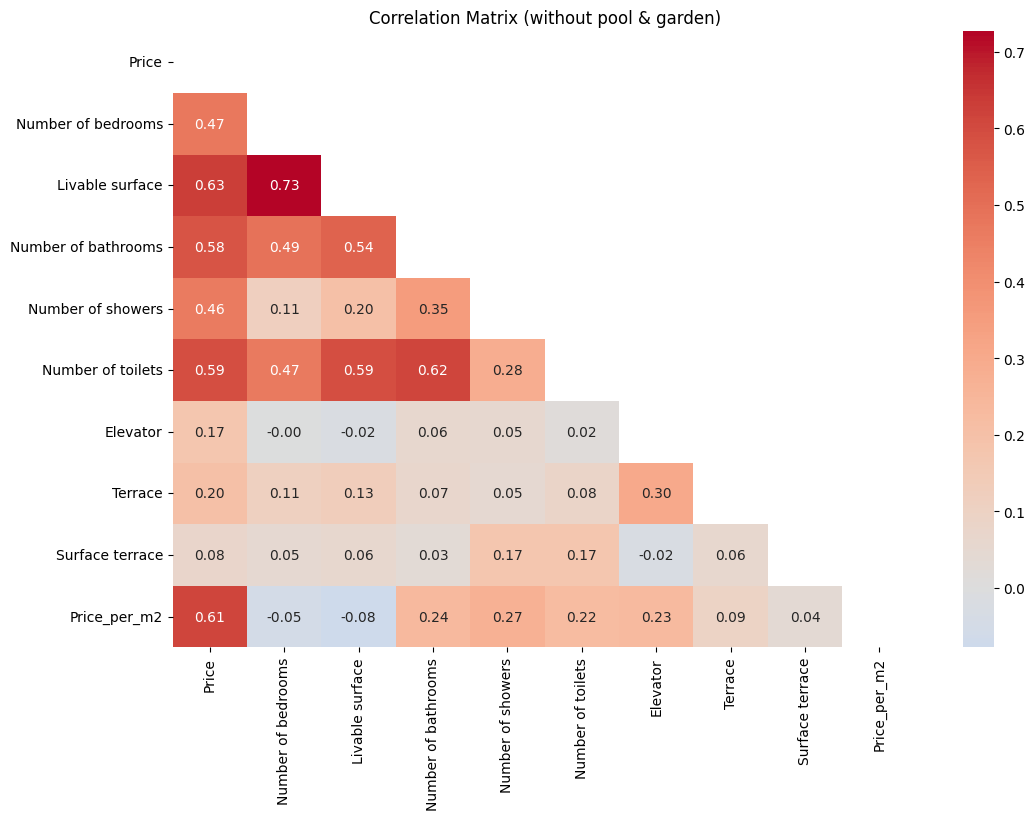

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

# Drop unwanted columns
apartments_clean = apartments.drop(columns=["Swimming pool", "Garden", "postal_code", "Number of facades", "Number of garages", "Furnished"])

# Select only numeric columns
numeric_cols = apartments_clean.select_dtypes(include='number').columns

# Compute correlation matrix
corr_matrix = apartments_clean[numeric_cols].corr()

# Correlation with Price
price_corr = corr_matrix['Price'].sort_values(ascending=False)
print(price_corr)

# Create upper-triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, mask=mask, fmt=".2f",
            cmap='coolwarm', center=0)
plt.title("Correlation Matrix (without pool & garden)")
plt.show()
